In [2]:
pip install pyclustering


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=d29557a790ed9daae701fb2a0f65f4c24fca110526f730bbeebb0b9f9dcc32f7
  Stored in directory: /root/.cache/pip/wheels/68/29/b4/131bd7deec3663cc311ab9aa64d6517c3e3ec24bcadfc32f74
Successfully built pyclustering


In [3]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

from pyclustering.cluster.kmedoids import kmedoids

In [4]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=42)

# ---------------------------
# Previous (True) Labels
# ---------------------------
y_true = np.array([
    0 if G.nodes[i]['club'] == 'Mr. Hi' else 1
    for i in G.nodes()
])

print("Previous (True) Labels:")
print(y_true)

Previous (True) Labels:
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [5]:
G = nx.karate_club_graph()

# Ground-truth labels
true_labels = np.array([
    0 if G.nodes[i]['club'] == 'Mr. Hi' else 1
    for i in G.nodes()
])

# Adjacency matrix
A = nx.to_numpy_array(G)

results = []

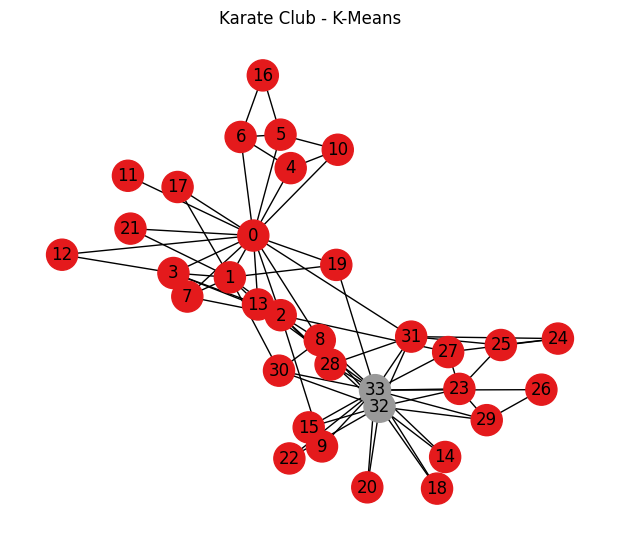

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

K_range = range(2, 10)
inertia = []

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(A)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(6, 5))
nx.draw(G, pos, node_color=labels_kmeans, cmap=plt.cm.Set1,
        with_labels=True, node_size=500)
plt.title("Karate Club - K-Means")
plt.show()

In [23]:
print("K-Means Labels:")
print(labels_kmeans)

K-Means Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]


K-Medoids Labels:
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1]


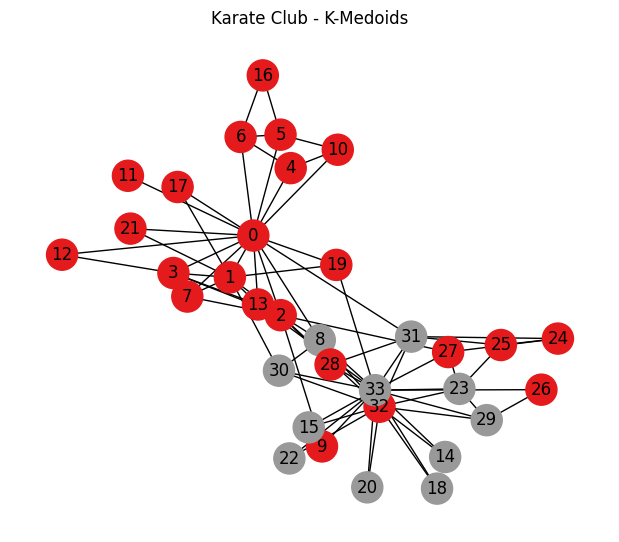

In [17]:
from pyclustering.cluster.kmedoids import kmedoids
import matplotlib.pyplot as plt
import numpy as np

K_range = range(2, 10)
costs = []

distance_matrix = 1 - A

for k in K_range:
    initial_medoids = list(range(k))

    kmedoids_temp = kmedoids(
        distance_matrix,
        initial_medoids,
        data_type='distance_matrix'
    )
    kmedoids_temp.process()

    clusters = kmedoids_temp.get_clusters()
    medoids = kmedoids_temp.get_medoids()

    # ---- Compute total medoid cost manually ----
    total_cost = 0
    for cluster_id, cluster in enumerate(clusters):
        medoid = medoids[cluster_id]
        for point in cluster:
            total_cost += distance_matrix[point][medoid]

    costs.append(total_cost)
# Labels from K-Medoids (already computed)
print("K-Medoids Labels:")
print(labels_kmedoids)

# ---------------------------
# K-Medoids Graph Visualization
# ---------------------------

plt.figure(figsize=(6, 5))
nx.draw(
    G,
    pos,
    node_color=labels_kmedoids,
    cmap=plt.cm.Set1,
    with_labels=True,
    node_size=500
)
plt.title("Karate Club - K-Medoids")
plt.show()




Spectral Clustering Predicted Labels:
[1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


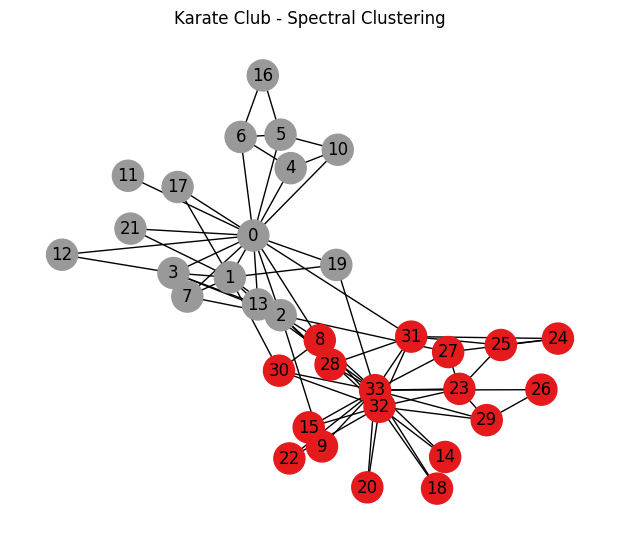

In [18]:
spectral = SpectralClustering(
    n_clusters=2,
    affinity='precomputed',
    random_state=42
)
labels_spectral = spectral.fit_predict(A)

ari_spectral = adjusted_rand_score(y_true, labels_spectral)
nmi_spectral = normalized_mutual_info_score(y_true, labels_spectral)

results.append(["Spectral Clustering", ari_spectral, nmi_spectral])

print("\nSpectral Clustering Predicted Labels:")
print(labels_spectral)

plt.figure(figsize=(6, 5))
nx.draw(G, pos, node_color=labels_spectral, cmap=plt.cm.Set1,
        with_labels=True, node_size=500)
plt.title("Karate Club - Spectral Clustering")
plt.show()

In [19]:
df_results = pd.DataFrame(
    results,
    columns=["Algorithm", "ARI", "NMI"]
)

print("\nARI & NMI Comparison Table:")
print(df_results)


ARI & NMI Comparison Table:
             Algorithm       ARI       NMI
0              K-Means  0.007178  0.092953
1            K-Medoids  0.260664  0.270510
2  Spectral Clustering  0.882258  0.837169
3  Spectral Clustering  0.882258  0.837169


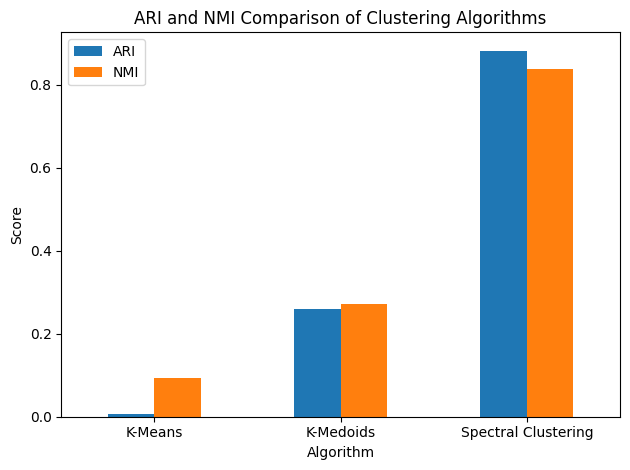

In [25]:

df_results_unique = df_results.drop_duplicates(subset="Algorithm", keep="first")

# BAR PLOT COMPARISON
df_results_unique.set_index("Algorithm")[["ARI", "NMI"]].plot(kind="bar")
plt.ylabel("Score")
plt.title("ARI and NMI Comparison of Clustering Algorithms")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


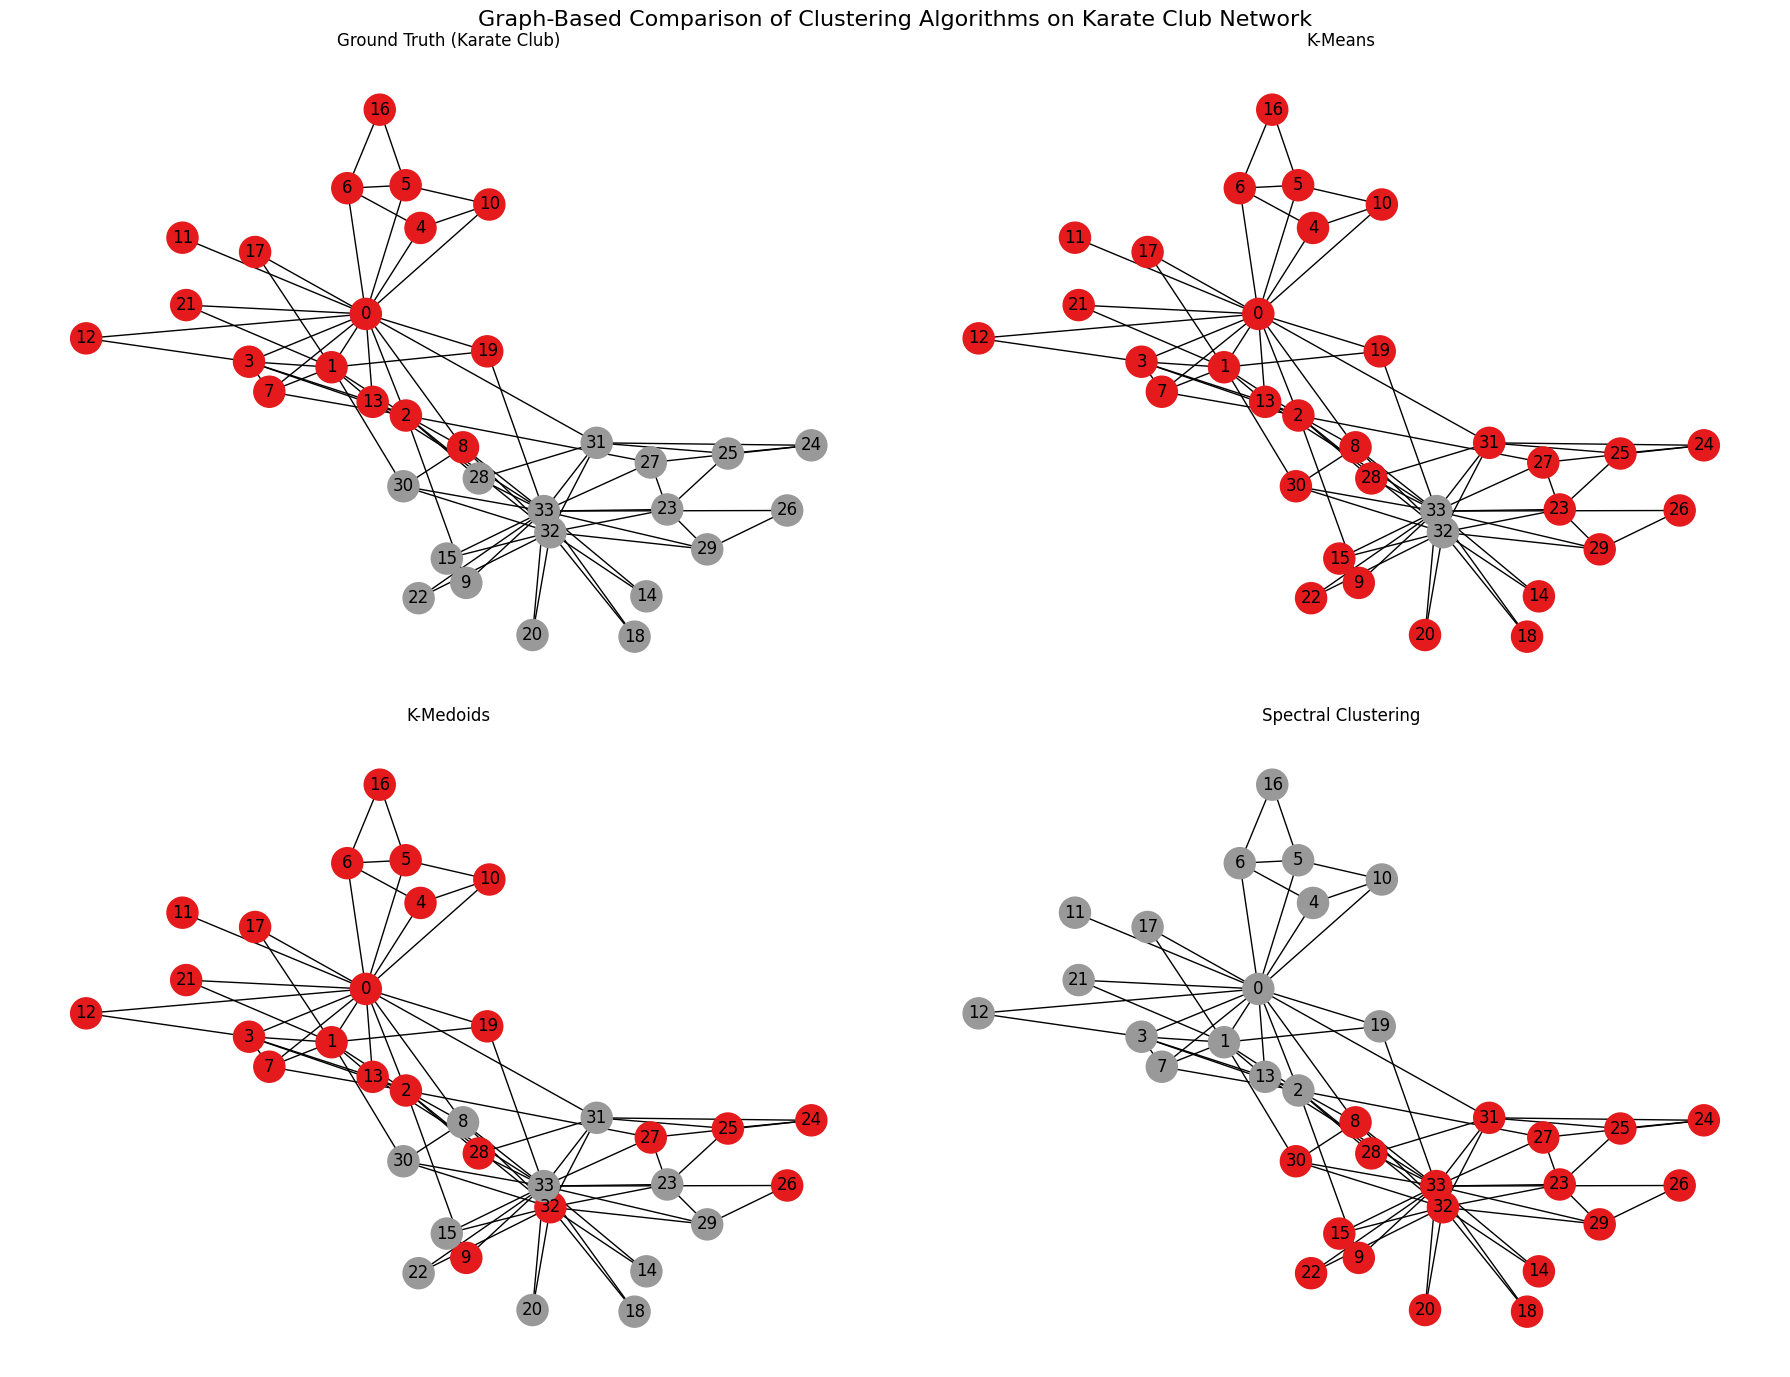

In [26]:
# Use same layout for fair comparison
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(18, 14))

# ---------------------------
# Ground Truth
# ---------------------------
plt.subplot(2, 2, 1)
nx.draw(
    G, pos,
    node_color=y_true,
    cmap=plt.cm.Set1,
    with_labels=True,
    node_size=500
)
plt.title("Ground Truth (Karate Club)")

# ---------------------------
# K-Means
# ---------------------------
plt.subplot(2, 2, 2)
nx.draw(
    G, pos,
    node_color=labels_kmeans,
    cmap=plt.cm.Set1,
    with_labels=True,
    node_size=500
)
plt.title("K-Means")

# ---------------------------
# K-Medoids
# ---------------------------
plt.subplot(2, 2, 3)
nx.draw(
    G, pos,
    node_color=labels_kmedoids,
    cmap=plt.cm.Set1,
    with_labels=True,
    node_size=500
)
plt.title("K-Medoids")

# ---------------------------
# Spectral Clustering
# ---------------------------
plt.subplot(2, 2, 4)
nx.draw(
    G, pos,
    node_color=labels_spectral,
    cmap=plt.cm.Set1,
    with_labels=True,
    node_size=500
)
plt.title("Spectral Clustering")

plt.suptitle(
    "Graph-Based Comparison of Clustering Algorithms on Karate Club Network",
    fontsize=16
)
plt.tight_layout()
plt.show()


# **Embedding**


ARI & NMI Comparison Table:
                     Algorithm       ARI       NMI
0    K-Means (Eigen Embedding)  0.402844  0.461010
1  K-Medoids (Eigen Embedding)  0.771725  0.732378
2          Spectral Clustering  0.882258  0.837169


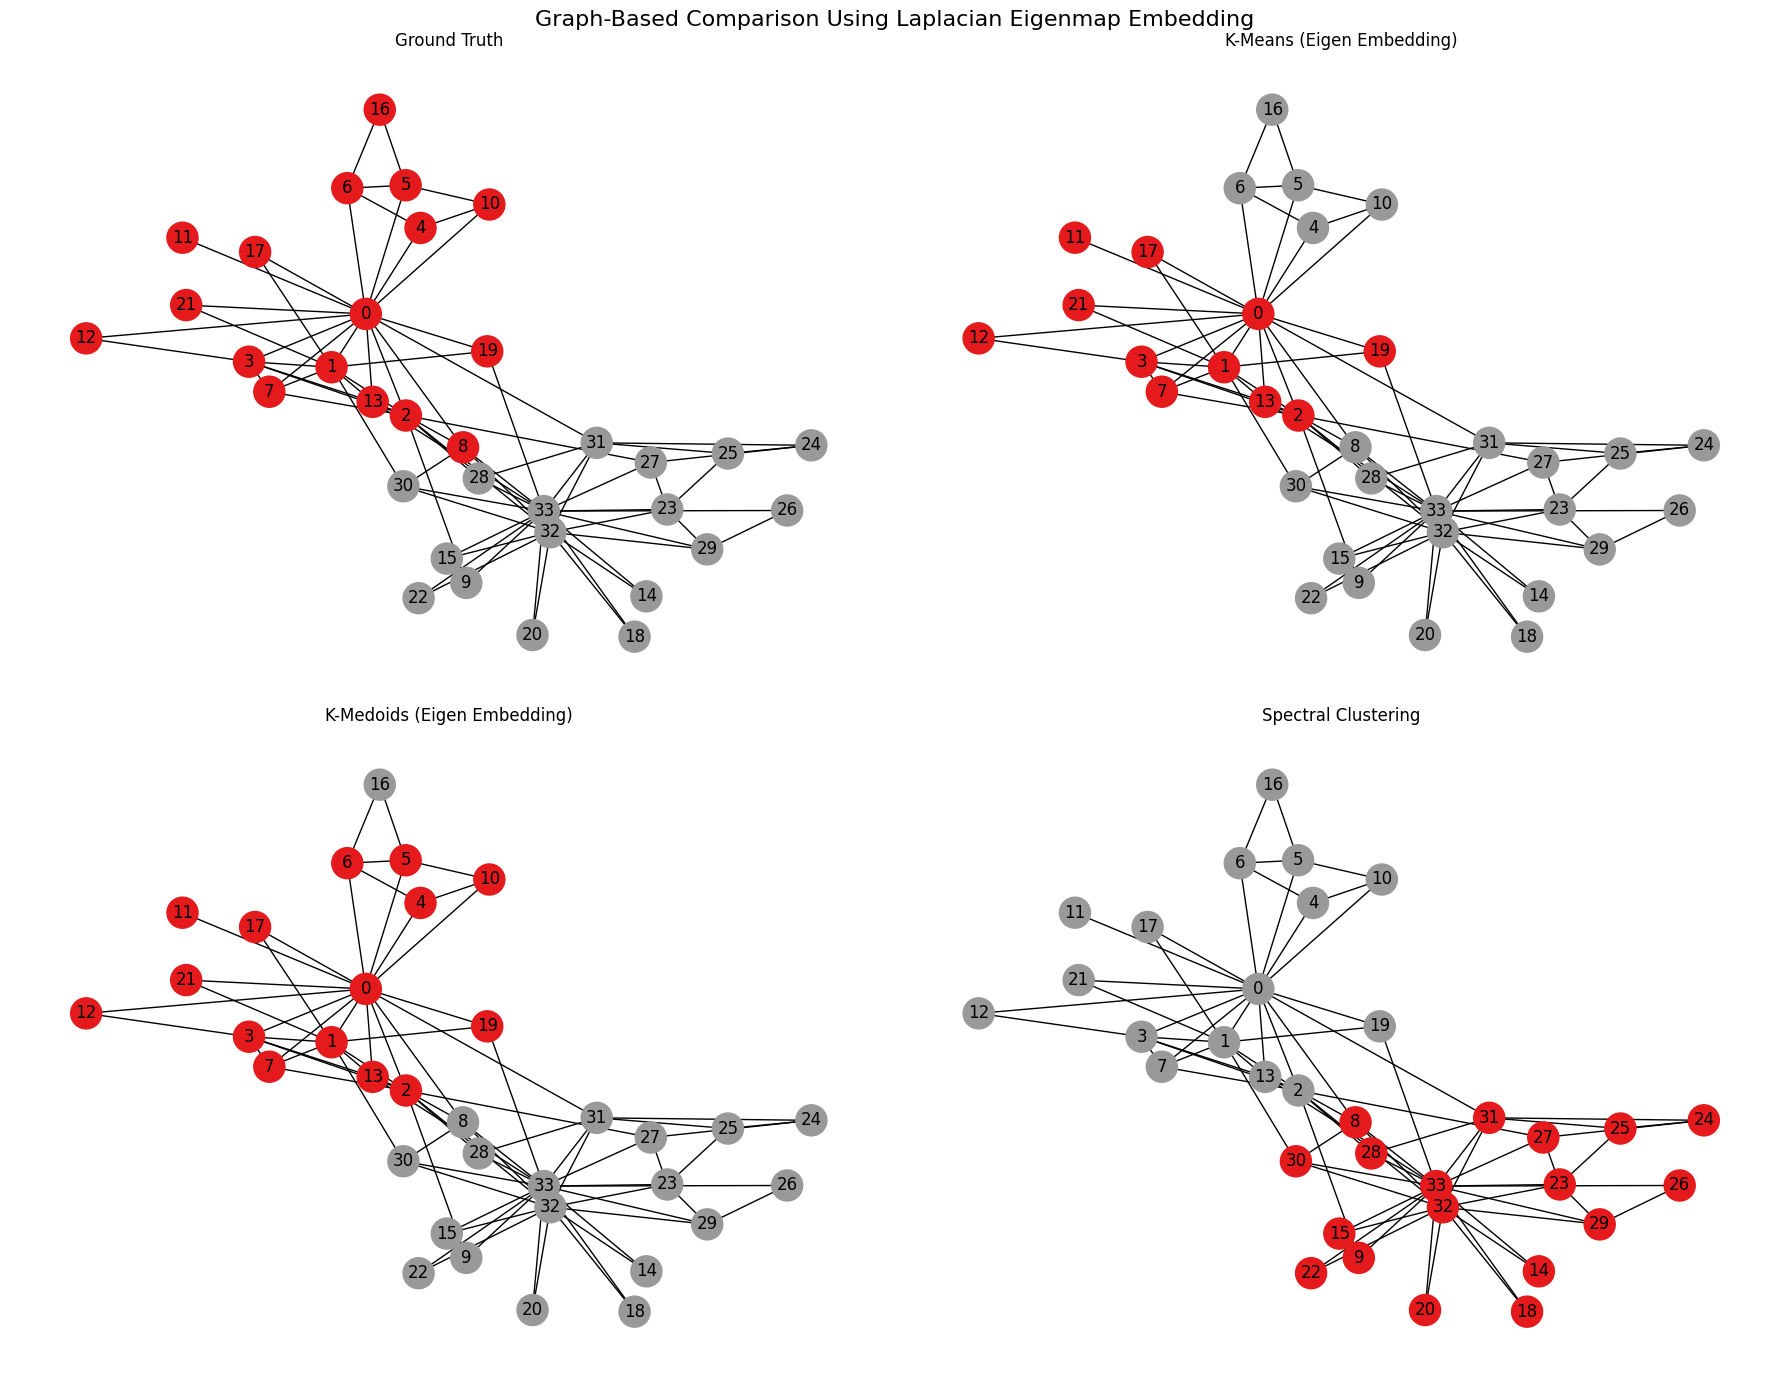

In [28]:
# ===============================
# FULL PIPELINE (NO node2vec)
# Embedding → Clustering → Results
# ===============================

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh

from pyclustering.cluster.kmedoids import kmedoids

# ---------------------------
# Load Karate Club Graph
# ---------------------------
G = nx.karate_club_graph()

# Ground-truth labels
y_true = np.array([
    0 if G.nodes[i]['club'] == 'Mr. Hi' else 1
    for i in G.nodes()
])

# ---------------------------
# Graph Embedding (Laplacian Eigenmap)
# ---------------------------
A = nx.to_numpy_array(G)
D = np.diag(A.sum(axis=1))
L = D - A

# Compute eigenvectors
eigvals, eigvecs = eigh(L)

# Use 2 smallest non-zero eigenvectors as embedding
X_embed = eigvecs[:, 1:3]

# ---------------------------
# Clustering
# ---------------------------
results = []

# ---- K-Means ----
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_embed)

results.append([
    "K-Means (Eigen Embedding)",
    adjusted_rand_score(y_true, labels_kmeans),
    normalized_mutual_info_score(y_true, labels_kmeans)
])

# ---- K-Medoids ----
distance_matrix = squareform(pdist(X_embed, metric='euclidean'))
initial_medoids = [0, 33]

kmedoids_instance = kmedoids(
    distance_matrix,
    initial_medoids,
    data_type='distance_matrix'
)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

labels_kmedoids = np.zeros(len(X_embed), dtype=int)
for cid, cluster in enumerate(clusters):
    for node in cluster:
        labels_kmedoids[node] = cid

results.append([
    "K-Medoids (Eigen Embedding)",
    adjusted_rand_score(y_true, labels_kmedoids),
    normalized_mutual_info_score(y_true, labels_kmedoids)
])

# ---- Spectral Clustering ----
spectral = SpectralClustering(
    n_clusters=2,
    affinity='precomputed',
    random_state=42
)
labels_spectral = spectral.fit_predict(A)

results.append([
    "Spectral Clustering",
    adjusted_rand_score(y_true, labels_spectral),
    normalized_mutual_info_score(y_true, labels_spectral)
])

# ---------------------------
# Results Table
# ---------------------------
df_results = pd.DataFrame(
    results,
    columns=["Algorithm", "ARI", "NMI"]
)

print("\nARI & NMI Comparison Table:")
print(df_results)

# ---------------------------
# Graph-Based Comparison
# ---------------------------
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(18, 14))

plt.subplot(2, 2, 1)
nx.draw(G, pos, node_color=y_true, cmap=plt.cm.Set1,
        with_labels=True, node_size=500)
plt.title("Ground Truth")

plt.subplot(2, 2, 2)
nx.draw(G, pos, node_color=labels_kmeans, cmap=plt.cm.Set1,
        with_labels=True, node_size=500)
plt.title("K-Means (Eigen Embedding)")

plt.subplot(2, 2, 3)
nx.draw(G, pos, node_color=labels_kmedoids, cmap=plt.cm.Set1,
        with_labels=True, node_size=500)
plt.title("K-Medoids (Eigen Embedding)")

plt.subplot(2, 2, 4)
nx.draw(G, pos, node_color=labels_spectral, cmap=plt.cm.Set1,
        with_labels=True, node_size=500)
plt.title("Spectral Clustering")

plt.suptitle("Graph-Based Comparison Using Laplacian Eigenmap Embedding", fontsize=16)
plt.tight_layout()
plt.show()
